## Code

In [ ]:
import cv2
import numpy as np
import streamlit as st
from tensorflow.keras.applications.mobilenet_v2 import (
    MobileNetV2,
    preprocess_input,
    decode_predictions
)
from PIL import Image

# using pre-trained 'MobileNetV2' CNN model for classifying images
def load_model():
    model = MobileNetV2(weights="imagenet")
    return model

# converting image into numbers (vectors) that model can understand
def preprocess_image(image):
    img = np.array(image)
    img = cv2.resize(img, (224,224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

def classify_image(model, image):
    try:
        processed_image = preprocess_image(image)
        predictions = model.predict(processed_image)
        decoded_predictions = decode_predictions(predictions, top=3)[0]     # showing top 3 predictions of classfied image

        return decoded_predictions

    except Exception as e:
        st.error(f"An error has occured: {str(e)}")
        return None

def main():
    # will cache the model so that when we re-run the script it won't need to load model again
    @st.cache_resource
    def load_cached_model():
        return load_model()

    model = load_cached_model()

    # creating simple UI
    st.set_page_config(page_title="AI Image Classifier", layout="centered")
    st.title("AI Image Classifier")
    st.write("Upload an image and let AI tell you what it is")
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg","png"])
    if uploaded_file is not None:
        image = st.image(
            uploaded_file, caption="Uploaded Image", use_container_width=True
        )
        btn = st.button("Classify Image")

        if btn:     # if button is pressed
            with st.spinner("Analyzing Image..."):
                image = Image.open(uploaded_file)
                predictions = classify_image(model, image)

                if predictions:
                    st.subheader("AI Predictions")
                    for _, label, score in predictions:
                        st.write(f"**{label}**: {score:.2%}")

if __name__ == "__main__":
    main()

## Demo

**UI**


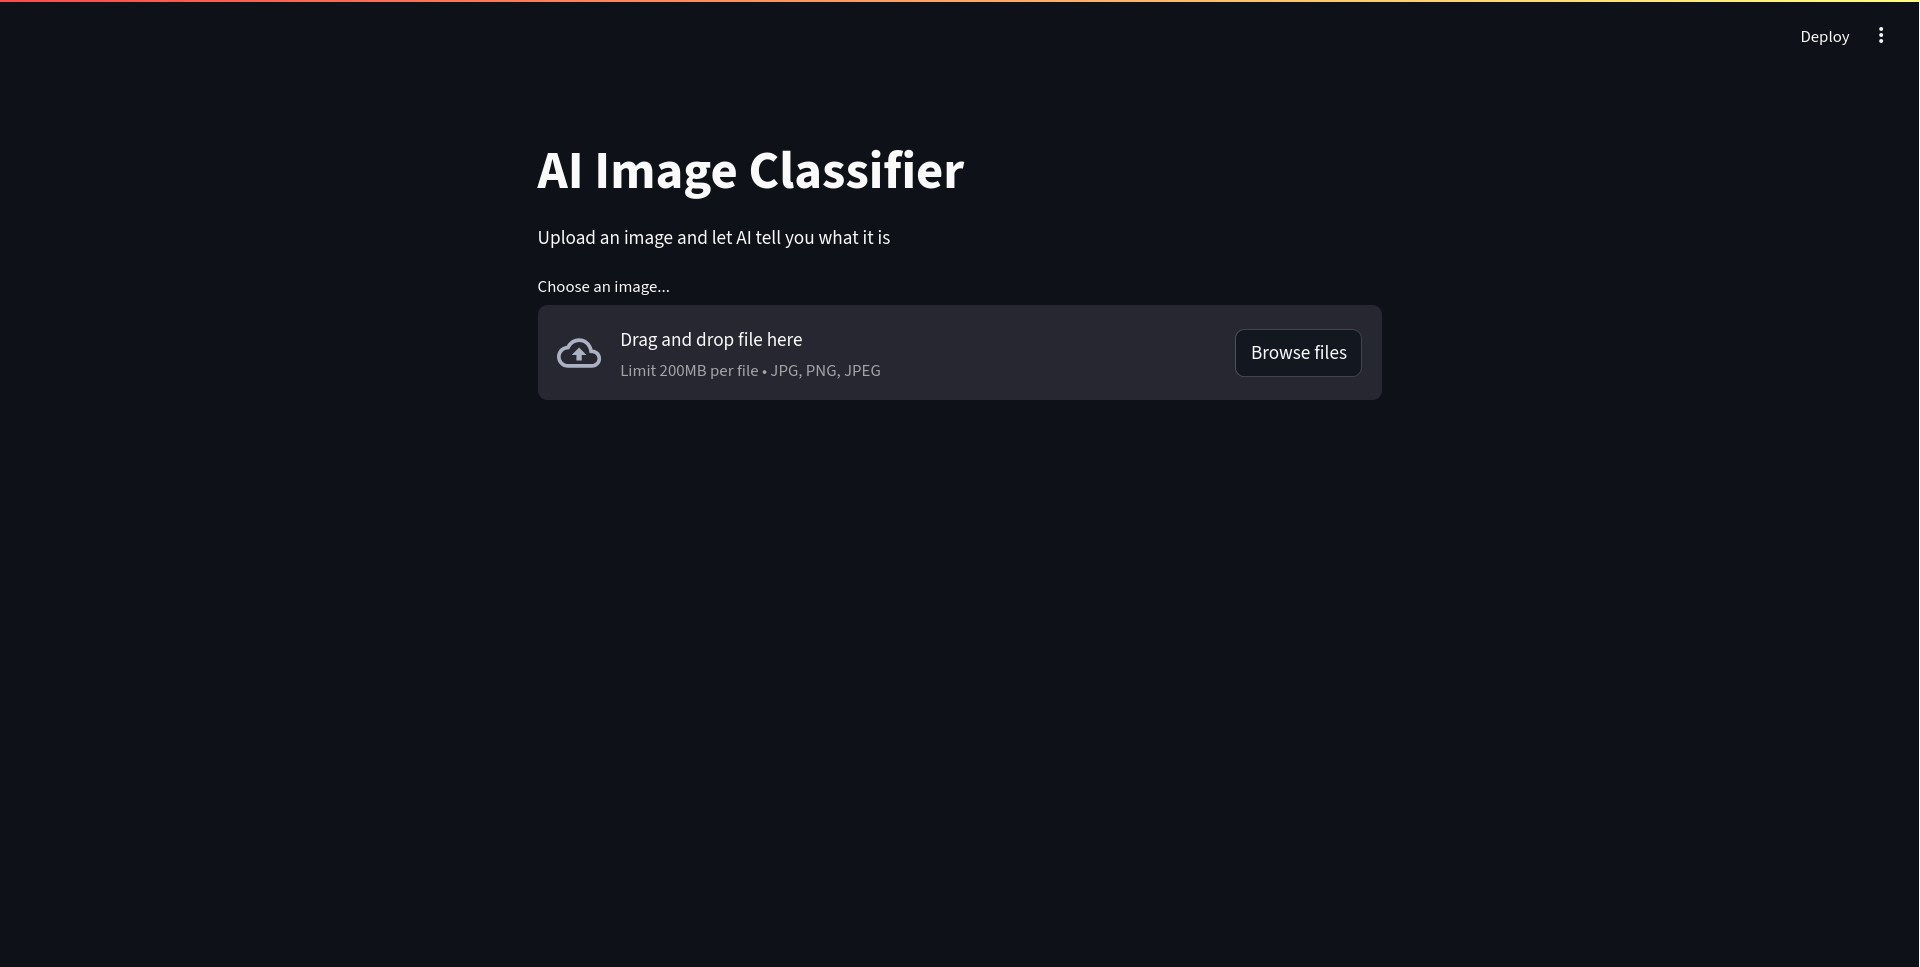

**SAMPLE OUTPUTS**

1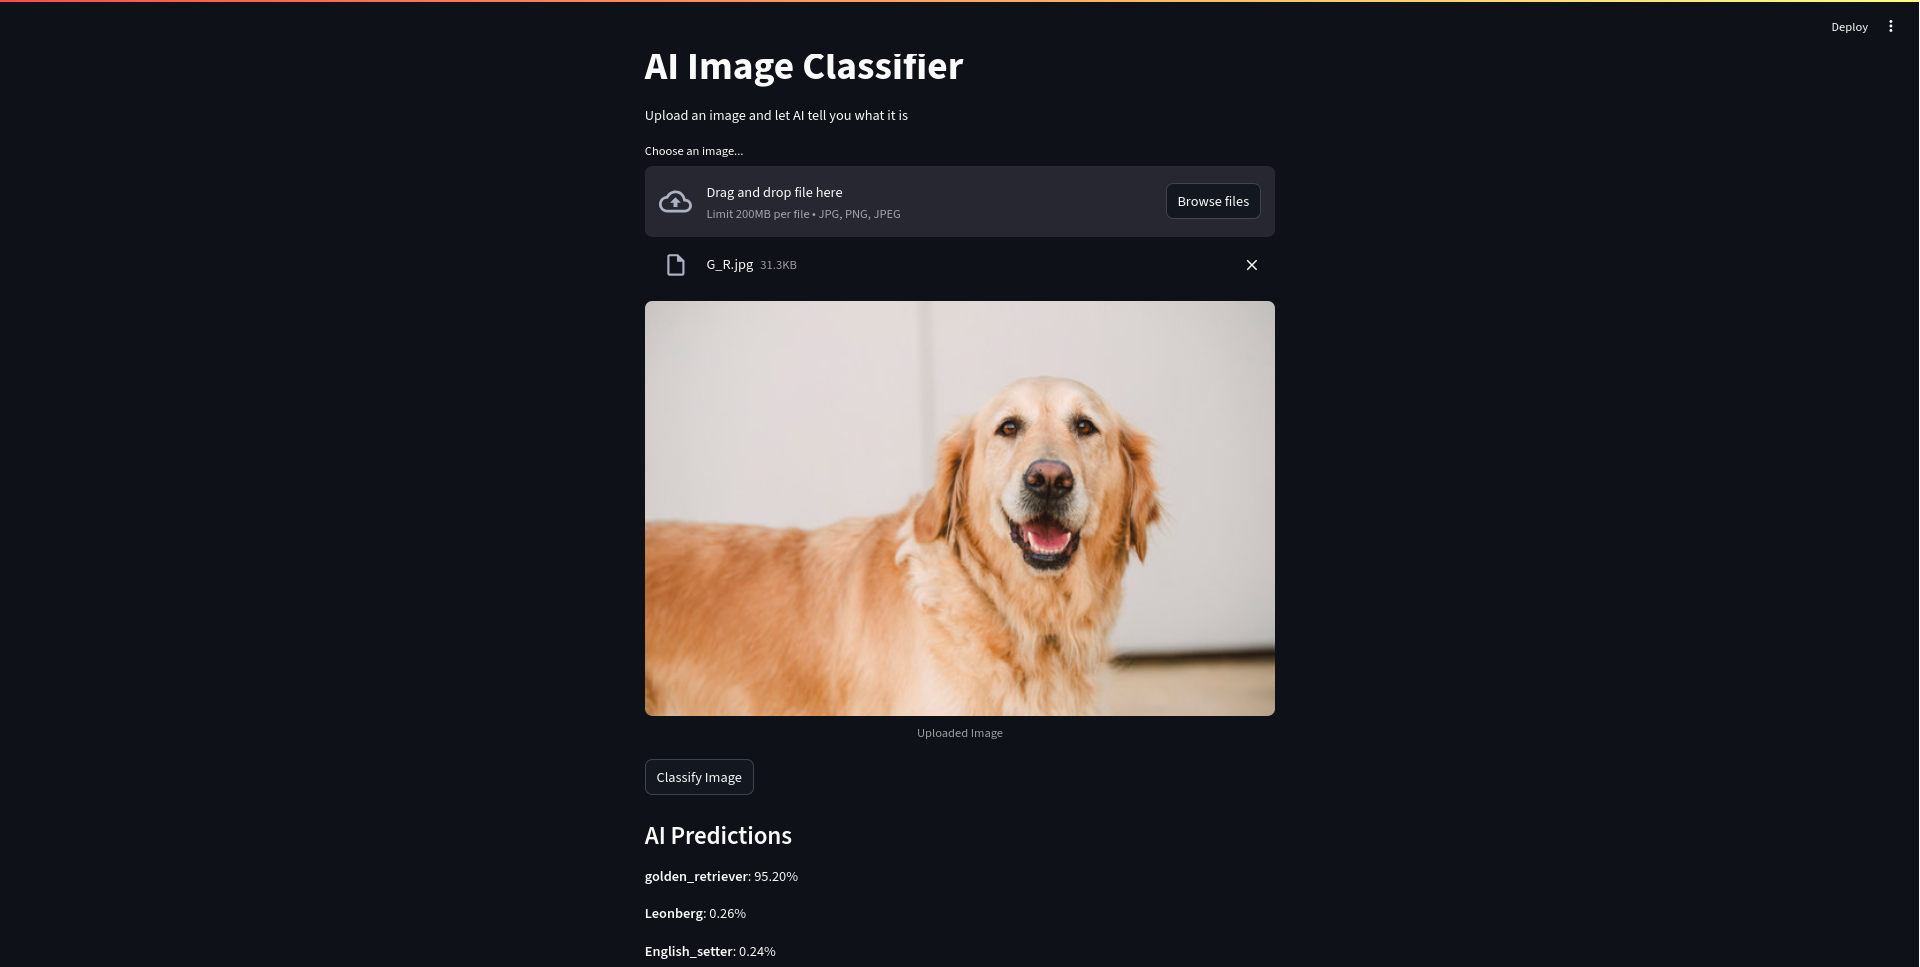


2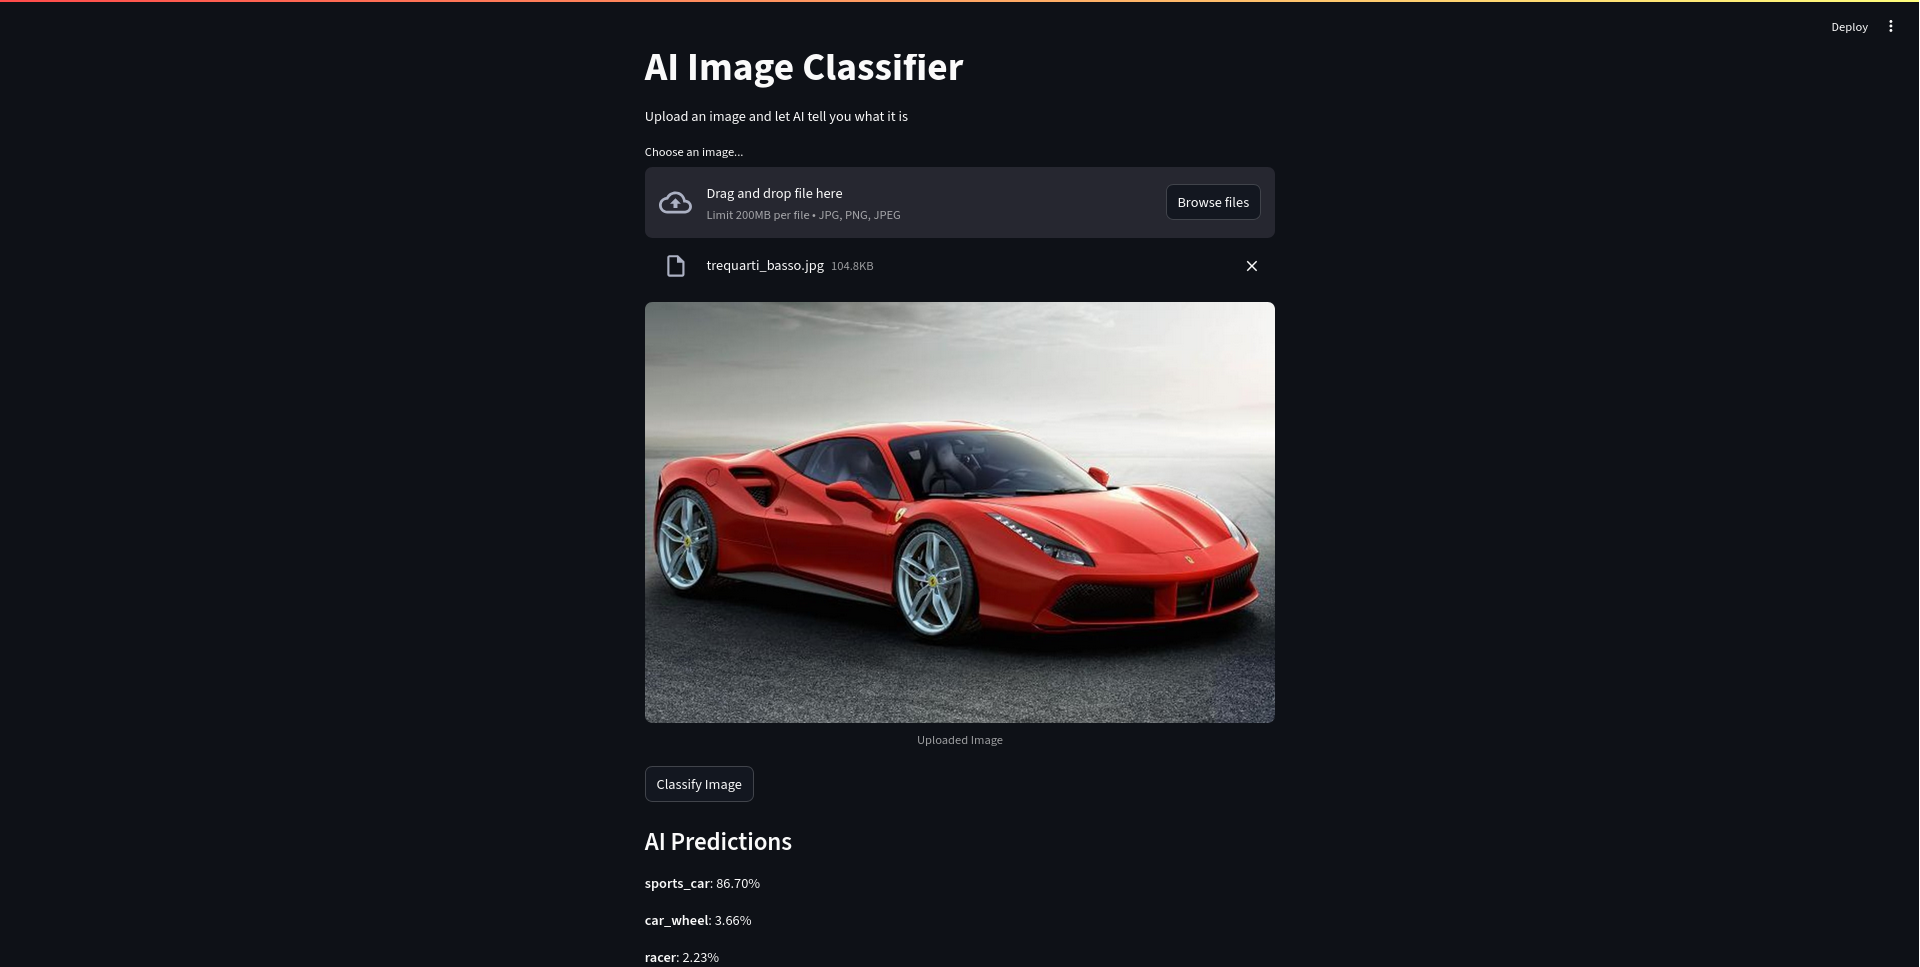